## Tasa de interés activa (%)

- DataFrame --> df_interes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def limpieza_indicadores(root):
    "limpieza del fichero inicial de cada indicador económico. Base de datos del Banco Mundial"
    
    df = pd.read_csv(root, header=0)
    df.rename(columns={'Country Name':'country', 'Indicator Name':'variables' }, inplace=True)
    df = df[df.country == 'México']
    df['country'] = df['country'].replace('México', 'MEXICO')
    df = df.drop(['country', 'Country Code', 'Indicator Code'], axis=1)
    
    
    return df

In [4]:
root_tasa_interes = "Variables_economicas/tasa de interes.csv"
df_interes = limpieza_indicadores(root_tasa_interes)
df_interes = df_interes.round(2)
df_interes = df_interes.replace({'Tasa de interés activa (%)': 'Tasa de interés(%)'})
df_interes.set_index('variables', inplace=True)

df_interes.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
Tasa de interés(%),18.23,19.3,59.43,36.39,22.14,26.36,23.74,16.93,12.8,8.21,...,4.91,4.68,4.27,3.55,3.44,4.75,7.33,8.04,8.43,6.34


In [8]:
df_interes = df_interes.transpose()

In [9]:
df_interes.describe()

variables,Tasa de interés(%)
count,28.000000
mean,12.841071
std,12.197746
min,3.440000
25%,6.075000
50%,7.800000
75%,17.255000
max,59.430000


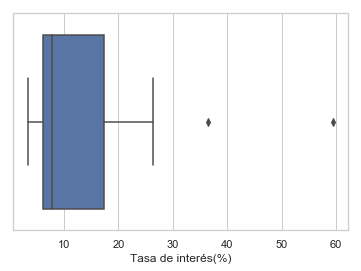

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_interes["Tasa de interés(%)"])

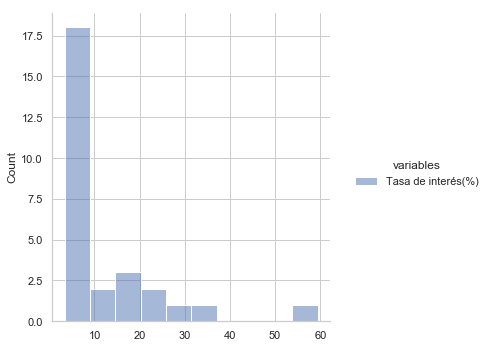

In [12]:
sns.displot(df_interes, bins=10)

Text(0.5, 1.0, 'Evolución de la tasa de interés activa en México')

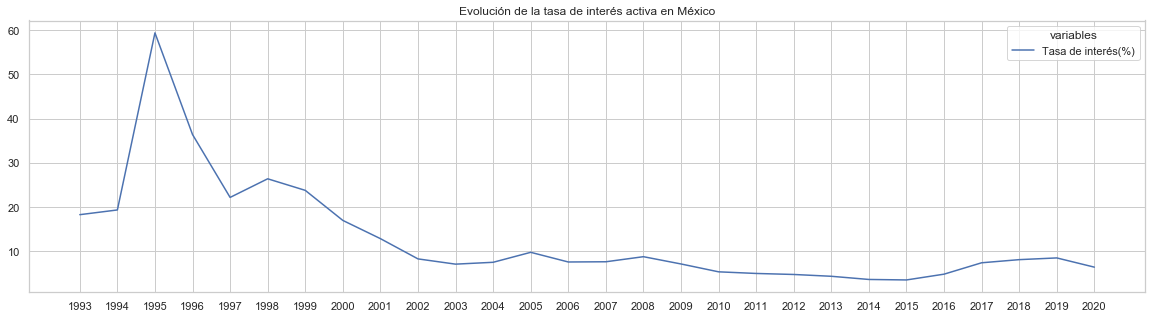

In [13]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_interes)
plt.title('Evolución de la tasa de interés activa en México')

In [14]:
df_interes.loc[df_interes['Tasa de interés(%)'] == df_interes['Tasa de interés(%)'].max()]

variables,Tasa de interés(%)
1995,59.43


In [15]:
df_interes.loc[df_interes['Tasa de interés(%)'] == df_interes['Tasa de interés(%)'].min()]

variables,Tasa de interés(%)
2015,3.44


In [16]:
%store df_interes

Stored 'df_interes' (DataFrame)
